In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("/Users/deepbhattacharjee/Documents/All Dataset/AirPassengers-2.csv",index_col=0,parse_dates=True)
df=df.dropna()
print(df.shape)
df.head()

(144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

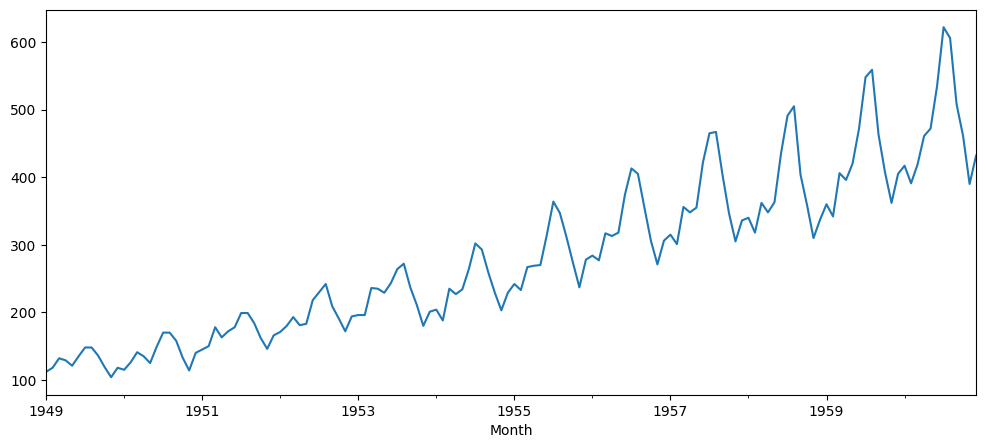

In [4]:
df[ '#Passengers'].plot(figsize= (12,5))

In [5]:
from  statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest= adfuller(dataset,autolag= 'AIC')
    print("1. ADF : ",dftest[0])
    print ("2. P-Value : ", dftest [1])
    print("3. Num Of Lags : ", dftest [2])
    print("4. Num Of Observations Used for ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items () :
        print("It", key,":", val)

In [6]:
ad_test(df['#Passengers'])


1. ADF :  0.8153688792060421
2. P-Value :  0.9918802434376409
3. Num Of Lags :  13
4. Num Of Observations Used for ADF Regression and Critical Values Calculation : 130
5. Critical Values :
It 1% : -3.4816817173418295
It 5% : -2.8840418343195267
It 10% : -2.578770059171598


In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [8]:
stepwise_fit= auto_arima(df['#Passengers'],trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sat, 08 Apr 2023   AIC                           1365.825
Time:                        19:01:08   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1718     85.615      8.458      0.000     556.369     891.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape, test.shape)

(114, 1) (30, 1)


In [11]:
model=ARIMA(train['#Passengers'],order=(4,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -500.966
Date:                Sat, 08 Apr 2023   AIC                           1017.933
Time:                        19:01:09   BIC                           1039.752
Sample:                    01-01-1949   HQIC                          1026.787
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0012      0.138      7.245      0.000       0.730       1.272
ar.L2          0.1388      0.216      0.644      0.520      -0.284       0.561
ar.L3         -0.4754      0.175     -2.709      0.007      -0.819      -0.132
ar.L4         -0.0762      0.105     -0.726      0.468      -0.282       0.129
ma.L1         -0.9678      0.126     -7.656      0.000      -1.216      -0.720
ma.L2         -0.7489      0.119     -6.318      0.000      -0.981      -0.517
ma.L3          0.9113      0.119      7.649      0.000       0.678       1.145
sigma2       389.3946     68.592      5.677      0.000     254.957     523.833
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.50   Prob(JB):                         0.35
Heteroskedasticity (H):               4.44   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels')
pred.index=df. index[start:end+1]
print(pred)

Month
1958-07-01    449.749082
1958-08-01    440.129253
1958-09-01    424.577519
1958-10-01    395.174569
1958-11-01    367.026386
1958-12-01    342.888663
1959-01-01    329.977140
1959-02-01    329.321051
1959-03-01    340.491477
1959-04-01    359.561587
1959-05-01    381.501147
1959-06-01    400.854205
1959-07-01    413.359379
1959-08-01    416.683285
1959-09-01    410.875161
1959-10-01    398.101935
1959-11-01    381.973968
1959-12-01    366.561189
1960-01-01    355.405743
1960-02-01    350.737597
1960-03-01    353.071223
1960-04-01    361.237255
1960-05-01    372.806324
1960-06-01    384.769300
1960-07-01    394.292875
1960-08-01    399.366593
1960-09-01    399.199876
1960-10-01    394.298317
1960-11-01    386.230017
1960-12-01    377.164181
Name: predicted_mean, dtype: float64


<Axes: xlabel='Month'>

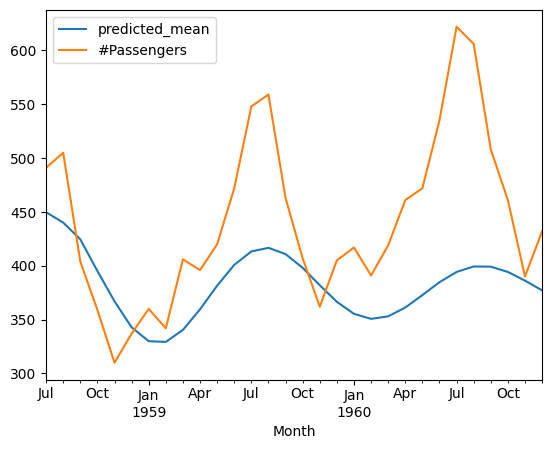

In [13]:
pred.plot(legend=True)
test['#Passengers'].plot(legend=True)

In [14]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse=sqrt (mean_squared_error (pred, test [ '#Passengers' ]) )
print (rmse)

88.16404440037624


In [15]:
test ['#Passengers']. mean ()

442.0

In [16]:
model2=ARIMA(df['#Passengers'],order=(4,1,3))
mode12=model2.fit()
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [17]:
pred=mode12.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA Predictions')

In [18]:
print(pred)

1961-01-01    467.573901
1961-02-01    490.494756
1961-03-01    509.137139
1961-04-01    492.554920
1961-05-01    495.306027
1961-06-01    475.947798
1961-07-01    476.339813
1961-08-01    475.552124
1961-09-01    472.353862
1961-10-01    483.889740
1961-11-01    475.570287
1961-12-01    485.921633
1962-01-01    479.133706
1962-02-01    480.987508
1962-03-01    482.221455
1962-04-01    476.211090
1962-05-01    483.942874
1962-06-01    475.847424
1962-07-01    482.794334
1962-08-01    479.012032
1962-09-01    479.518718
1962-10-01    482.449521
1962-11-01    476.974025
1962-12-01    483.511092
1963-01-01    477.258828
1963-02-01    481.769016
1963-03-01    479.829720
1963-04-01    478.956159
1963-05-01    482.304372
1963-06-01    477.413149
1963-07-01    482.698443
Freq: MS, Name: ARIMA Predictions, dtype: float64
